<a href="https://colab.research.google.com/github/chris-lovejoy/CodingForMedicine/blob/main/exercises/Breast_cancer_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diagnosing Breast Cancer from Histology Features


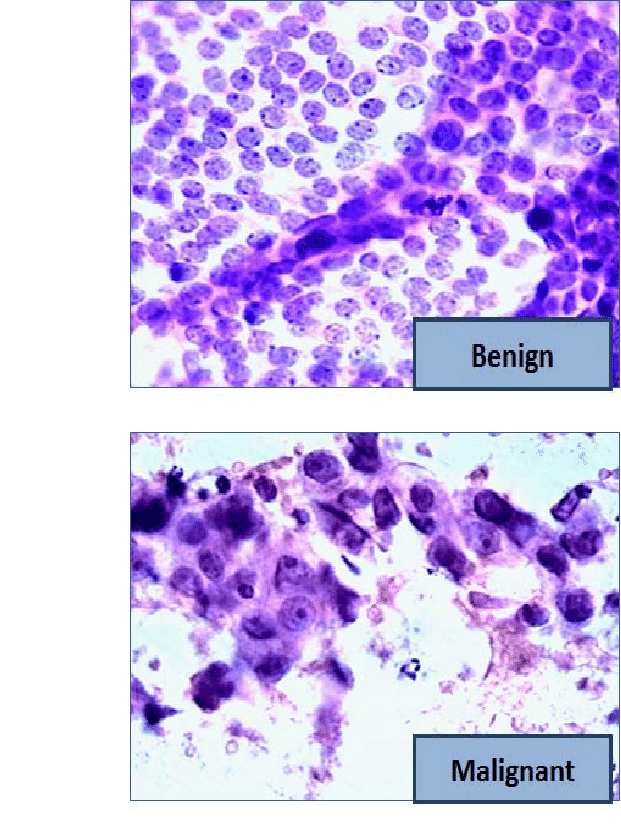

https://www.researchgate.net/figure/FNA-results-for-benign-and-malignant-tumor-under-the-microscope_fig1_286571014

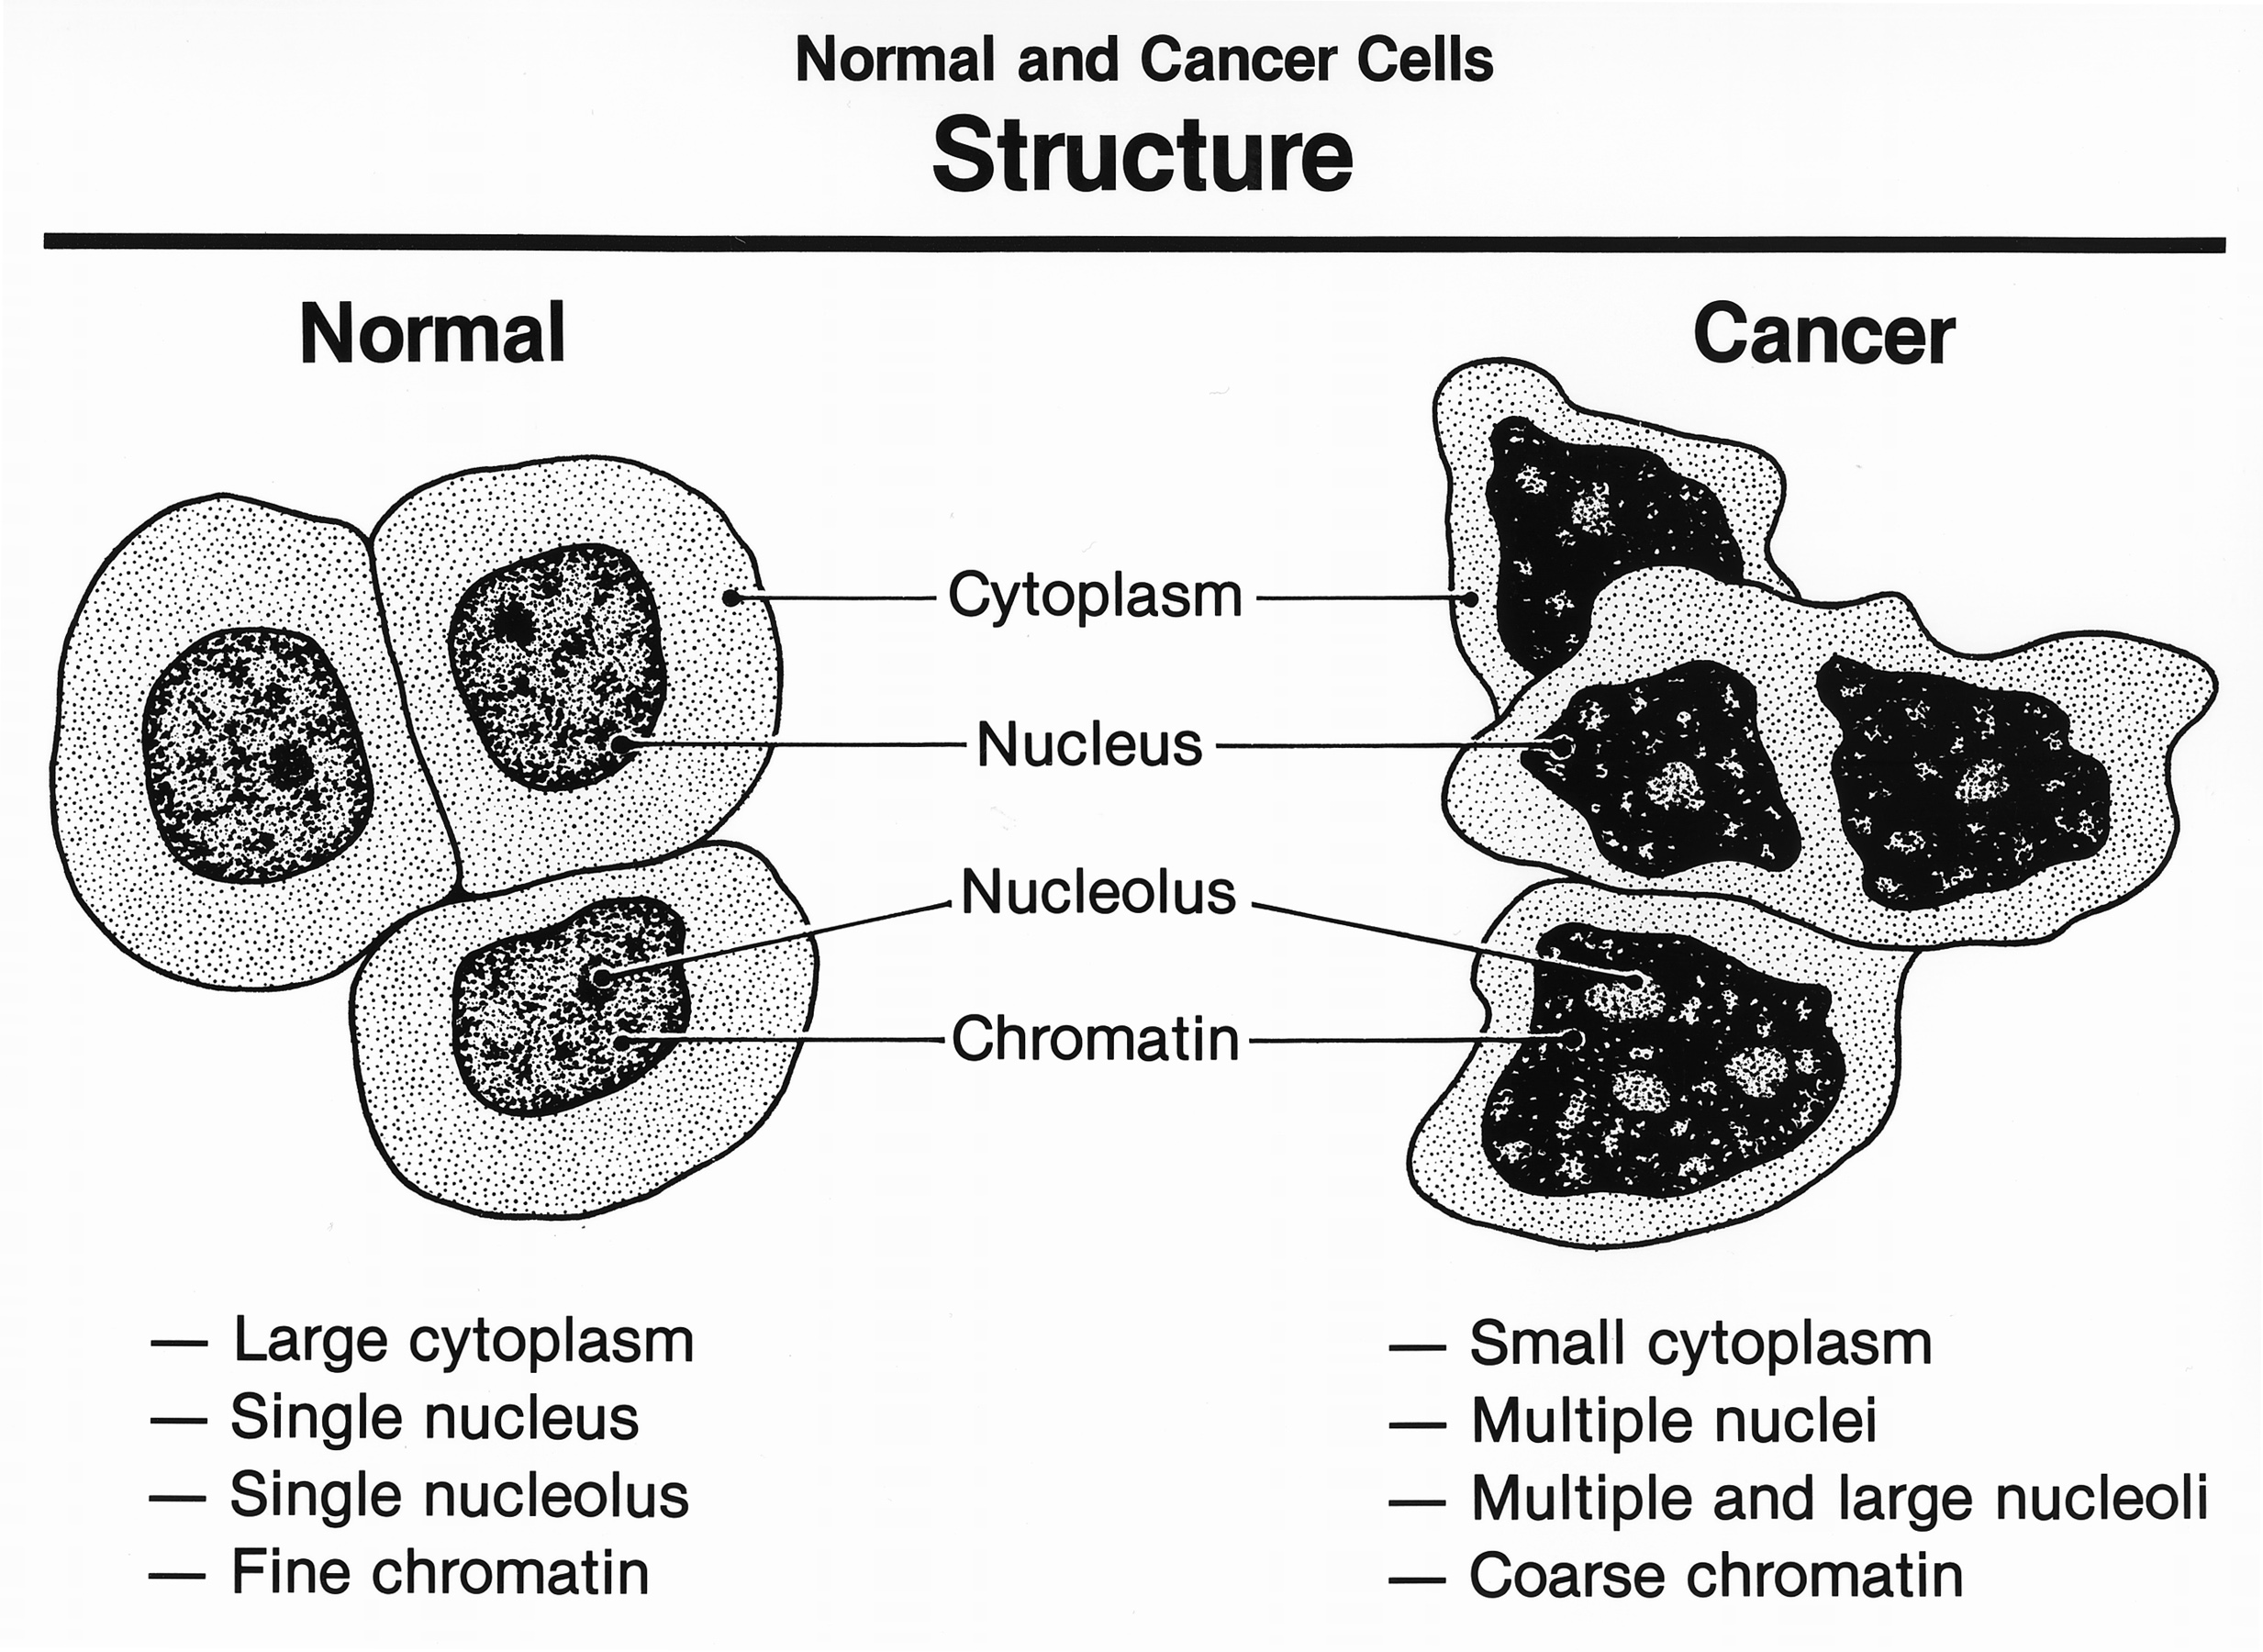

**In this exercise, we will train different machine learning models (including a neural network) to predict whether a breast cancer sample is malignant or benign.**

Our models will use features extracted from breast samples from the publicly-available ["Breast Cancer Wisconsin" dataset](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/download?datasetVersionNumber=2).

This is a *classification* problem because we're asking the algorithm to classify samples into one of two classes: **malignant or benign**. We'll train a neural network for this task - MLPClassifier' from sci-kit learn.

We will also try out
- Logistic Regression
- Random Forest
- K-nearest neighbours
- support vector machines (SVMs)

In this exercise, we'll learn how to:

- **Download data** and **load into Googl Colab**
- **Import useful libraries** like pandas and sci-kit learn
- **Clean our data**
- **Divide our model** for training and testing
- **Quantify the performance** of our model


## Part 1: Downloading and importing our data

To train a machine learning model, the first thing we need is data.

There are various open-source datasets available on the internet. Great sources of datasets include [Kaggle](https://www.kaggle.com/), [Papers with Code](https://paperswithcode.com/datasets) and [data.world](https://data.world/datasets/health).

For this exercise, we're using a dataset available on Kaggle. You can view information about the dataset and download it [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data). (You may need to create a Kaggle account, which is definitely worth doing - Kaggle is great.)

*Note: we want version 2 of the dataset.*

### Downloading and moving our data

Once we've downloaded the data, we're looking for the *.csv* file (it may be within a .zip file, which needs unzipping). CSV stands for 'comma-separated value' and means that each row of data is stored with values separated by commas. You can open the file in a 'plain text' editor (like Notepad (windows) or TextEdit (Mac)) to see what this looks like.

Next go to the folder in google drive that has your pythonfile. In that same folder upload the data. This way both your folder and your code are in the same folder on google drive

**Using Google Colab**, you need to:
1. Make sure you are connected to a runtime (click Connect in the top right if you aren't)
2. Make sure data file is in the same file as your Google Colab notebook



### Importing the 'pandas' library

To load our data, we're going to use a popular library called ["Pandas"](https://pandas.pydata.org). A library is a collection of code with ready-made functions that we can use. We can import it with one line of code and then use it for a wide range of functionality.

In [ ]:
import pandas as pd

### Mount your google drive onto google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once we have our data in the correct place and pandas imported, we can load it with the following command. This uses one of the *pandas* functions **read_csv()**, which lets us load csv files and save them as a **'DataFrame'** (which is basically a table). The exact path to your data may differ - please change '/content/drive/MyDrive/Colab Notebooks 137/data.csv' to match the path to your own data. You can find the file and the exact path to file by clicking on the folder icon on the left

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks 137/data.csv')

Our table should now be saved in the 'df' variable, so we can see it by running the cell below.

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Part 2: Visualising our data

Before we start training our model, it's important to understand our dataset. The first step is to read any accompanying information we have about our data. For some projects, this may involve asking questions to whoever provided the data. In our case, there is a helpful description on Kaggle [here](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data).

The second step is to explore the data ourselves. Several functions can be helpful for this.

Let's start by using the **.head()** and **.tail()** functions to look at the top and bottom of our table:

In [ ]:
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [ ]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


Lets visulaize the data for radius mean for both benigh and malignant cells

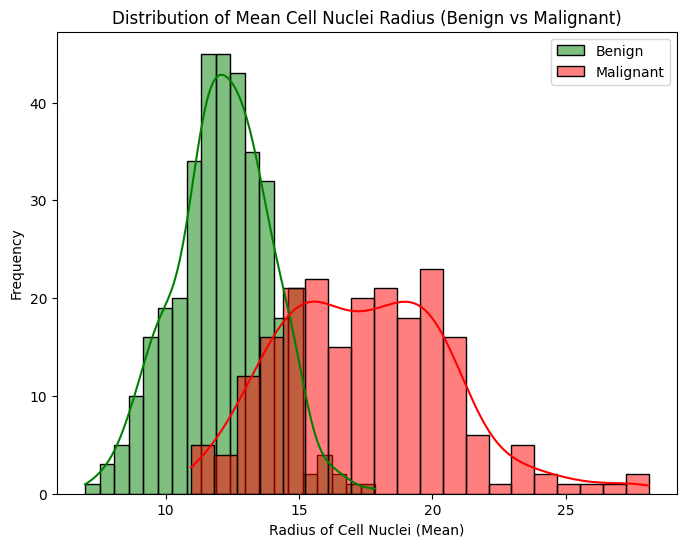

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for more styling options


# Separate data for benign and malignant cells
benign_cells = df[df['diagnosis'] == 'B']['radius_mean']  # Use 'B' as a string
malignant_cells = df[df['diagnosis'] == 'M']['radius_mean'] # Use 'M' as a string

# Create the histogram using Seaborn
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.histplot(benign_cells, bins=20, color='green', label='Benign', kde=True, alpha=0.5)
sns.histplot(malignant_cells, bins=20, color='red', label='Malignant', kde=True, alpha=0.5)

plt.xlabel('Radius of Cell Nuclei (Mean)')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Cell Nuclei Radius (Benign vs Malignant)')
plt.legend()
plt.show()

A helpful function for understanding each variable is **.describe()**. Let's use this to look at radius_mean. Feel free to modify the code below to understand other variables.

In [ ]:
df.radius_mean.describe()

,radius_mean
count,569.000000
mean,14.127292
std,3.524049
min,6.981000
25%,11.700000
50%,13.370000
75%,15.780000
max,28.110000


There are similar functions for looking at different averages, in particular, median and mode:

In [ ]:
df.radius_mean.median()

13.37

In [ ]:
df.radius_mean.mode()

,radius_mean
0,12.34


Take some time to look at the different variables and understand them.


**Execute the line of code below, describe its output and explain how it differs from the previous *.describe()* command**

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Part 3: Cleaning our data

You may have noticed a column on the far right called "Unnamed: 32" and that it's full of "NaN" values. "NaN" stands for 'not a number' and can be caused by various things. In some cases, an empty column in a spreadsheet file can be picked up as a column, and all values are 'NaN's - that appears to be the case here.

We can remove the columns using the **drop()** function:

In [ ]:
df = df.drop('Unnamed: 32', axis=1)

In [ ]:
df=df.drop('id',axis=1)

In [ ]:
df=df.drop(['texture_worst', 'radius_worst','fractal_dimension_worst','symmetry_worst','concavity_worst'], axis=1) # Pass labels to drop as a list.

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concave points_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.04904,0.05373,0.01587,0.03003,0.006193,184.60,2019.0,0.16220,0.66560,0.2654
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.01308,0.01860,0.01340,0.01389,0.003532,158.80,1956.0,0.12380,0.18660,0.1860
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.04006,0.03832,0.02058,0.02250,0.004571,152.50,1709.0,0.14440,0.42450,0.2430
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.07458,0.05661,0.01867,0.05963,0.009208,98.87,567.7,0.20980,0.86630,0.2575
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.02461,0.05688,0.01885,0.01756,0.005115,152.20,1575.0,0.13740,0.20500,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.02891,0.05198,0.02454,0.01114,0.004239,166.10,2027.0,0.14100,0.21130,0.2216
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.02423,0.03950,0.01678,0.01898,0.002498,155.00,1731.0,0.11660,0.19220,0.1628
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.03731,0.04730,0.01557,0.01318,0.003892,126.70,1124.0,0.11390,0.30940,0.1418
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.06158,0.07117,0.01664,0.02324,0.006185,184.60,1821.0,0.16500,0.86810,0.2650


One common problem with real-world datasets is missing data or outliers. We can check the number of missing values with the isna() function. This returns a table that shows whether each cell is a NaN or not:

In [ ]:
df.isna()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concave points_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


And we can find the total number of NaNs in each column of our table using the following cell. (See if you can figure out how it works.)

In [ ]:
sum(df.isna().values)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

The return value of `df.isna().values` is an array containing boolean values, indicating missing values in each element in the DataFrame.

The sum method treats `true` and `false` as `1` and `0` and returns the total count of missing values within the DataFrame.

**Great - no missing data**

In [ ]:
df.shape


(569, 26)

**df is a matrix with 569 rows and 26 colums - the first column is the target variable M=Malignant, B=Benign. The next 30 colums are the features**

## Part 4: Preparing our data for model training

### Converting to binary

Computers like to work with binary values of 0 or 1 much more than with text. So let's convert our 'diagnosis' column values from 'M' for malignant and 'B' for binary into 1 and 0:

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concave points_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,0.04904,0.05373,0.01587,0.03003,0.006193,184.60,2019.0,0.16220,0.66560,0.2654
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.01308,0.01860,0.01340,0.01389,0.003532,158.80,1956.0,0.12380,0.18660,0.1860
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.04006,0.03832,0.02058,0.02250,0.004571,152.50,1709.0,0.14440,0.42450,0.2430
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,0.07458,0.05661,0.01867,0.05963,0.009208,98.87,567.7,0.20980,0.86630,0.2575
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.02461,0.05688,0.01885,0.01756,0.005115,152.20,1575.0,0.13740,0.20500,0.1625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,0.02891,0.05198,0.02454,0.01114,0.004239,166.10,2027.0,0.14100,0.21130,0.2216
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,0.02423,0.03950,0.01678,0.01898,0.002498,155.00,1731.0,0.11660,0.19220,0.1628
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,0.03731,0.04730,0.01557,0.01318,0.003892,126.70,1124.0,0.11390,0.30940,0.1418
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,0.06158,0.07117,0.01664,0.02324,0.006185,184.60,1821.0,0.16500,0.86810,0.2650


The map method replaces each value in the dataframe column specified by accepting a dictionary as an argument where the keys are the original values (`'M'` and `'B'` ) and the values to replace them with (`1` and `0`).

### Creating a train-test split

We need to divide our data into 'training' and 'test' data. We do this so we can understand whether our model is actually helpful. In the real world, we want to use our model on data it's never seen before.

When training the model, we only show it the 'training' data. We can then test it on the 'test' data and use that to understand how well the model may perform on new (unseen) data.

Let's again use a function from the sci-kit learn library.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(df, test_size = 0.20)

The variable `test_size` determines what ratio of our data is kept back as 'test' data. `0.15` means that 15% of the test data will be held back.

We want enough test data that we can reliably assess the performance of our model. If we only used, say, 5% of data for testing, then we'd be less confident on the final score. However, we also don't want to use *too* much data for testing because the model would have less data for training, so might ultimately be a less good model.

Therefore, something in the range of ~10% to ~30% is typical. For very large datasets, it's possible to use a lower percentage, because even a low percentage still contains enough datapoints to reliably test performance.


**Create a function that accepts the training and test data as arguments and prints the train and test size**.

The output should be something like below, where Number is the size of the training set.

`The size of the training set: Number `

`The size of the test set: Number`


In [ ]:
def train_test_size(train, test):
    # Added indentation
    print(train.shape) # Added example functionality
    print(test.shape) # Added example functionality

train_test_size(train, test)

(455, 26)
(114, 26)


### Normalising our data

In our dataset, different features have different ranges of values. For example, the maximum value of the 'perimeter_mean' feature is 188.5, while for the 'smoothness_mean' feature it is 0.1634.

For some machine learning models, this can affect the model's performance because it can care more about changes in the larger feature.

Therefore, it's best practice to 'normalise' the data, which involves bringing everything into the same range. One popular way of doing so is called 'max/min' normalisation, and it moves all values into the range 0 to 1.

Again, we can use a **library** to do this, so we don't have to write much code ourselves. We'll use the **sci-kit learn** library:

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

If we look at our data again, we'll see that all values are now between 0 and 1: Note minmaxscalar does nothiing to the 0 1 binary column for diagnosis

In [ ]:
train.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concave points_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,0.380220,0.338053,0.329948,0.332709,0.216949,0.397955,0.260491,0.207296,0.243132,0.406439,...,0.220614,0.079303,0.221593,0.179899,0.098675,0.284655,0.172536,0.408884,0.221070,0.394410
std,0.485975,0.167006,0.147549,0.168029,0.149558,0.128985,0.160097,0.185758,0.191573,0.144961,...,0.165429,0.077965,0.116988,0.117832,0.089462,0.168853,0.141752,0.153293,0.150980,0.225646
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.221213,0.226243,0.215327,0.115885,0.306491,0.139041,0.068791,0.100025,0.303088,...,0.102575,0.036793,0.144383,0.103324,0.045662,0.167015,0.081031,0.306941,0.114154,0.221753
50%,0.000000,0.302854,0.312479,0.294036,0.173446,0.395685,0.230262,0.144189,0.165706,0.396533,...,0.176364,0.064242,0.205152,0.154190,0.077429,0.236815,0.123722,0.399062,0.184058,0.343986
75%,1.000000,0.414549,0.411228,0.413655,0.268823,0.476393,0.340991,0.309747,0.380815,0.484832,...,0.286064,0.101288,0.273916,0.221731,0.124915,0.381443,0.230363,0.500099,0.301549,0.561856
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


*(If you're having trouble downloading the library and importing it, you can skip this section and the code will still run - it just won't give as reliable a result.)*

**Note:** Normalisation across instances should be done after splitting the data between the training and test set, using only the data from the training set.

The test set plays the role of fresh, unseen data, so it should not be accessible at the training stage. Using any information from the test set before or during training is a potential **data leakage** that can cause bias in the performance evaluation.

We will apply the normalisation parameters previously obtained from the training set to normalise the test set.

In [ ]:
test = pd.DataFrame(scaler.transform(test), columns = test.columns)

In [ ]:
test

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concave points_worst
0,0.0,0.329358,0.117010,0.321471,0.191177,0.651530,0.239771,0.236645,0.328777,0.496208,...,0.290145,0.120278,0.540443,0.130410,0.160068,0.219682,0.115046,0.450571,0.105859,0.348797
1,0.0,0.127124,0.296923,0.122314,0.061760,0.332491,0.132507,0.069072,0.075249,0.638137,...,0.169355,0.068535,0.187213,0.164884,0.104273,0.101947,0.049155,0.344912,0.123129,0.225430
2,0.0,0.280610,0.223876,0.267708,0.158176,0.241762,0.105147,0.090745,0.118141,0.416576,...,0.130756,0.058611,0.159500,0.149828,0.043434,0.201205,0.102094,0.254441,0.119636,0.282990
3,1.0,0.568839,0.311126,0.550135,0.421845,0.266679,0.186798,0.217221,0.279672,0.479957,...,0.240600,0.102020,0.257814,0.174734,0.061882,0.487026,0.332481,0.204253,0.193178,0.418557
4,0.0,0.276823,0.203585,0.270196,0.154146,0.340977,0.194191,0.136715,0.152982,0.349404,...,0.150824,0.083788,0.158363,0.114369,0.048167,0.213208,0.103372,0.405666,0.226747,0.336186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.0,0.079985,0.160298,0.073457,0.035504,0.349824,0.071713,0.000000,0.000000,0.358613,...,0.055258,0.000000,0.000000,0.270558,0.086515,0.039594,0.018187,0.297365,0.041990,0.000000
110,1.0,0.521037,0.370308,0.511437,0.359788,0.460143,0.340531,0.281396,0.438569,0.504875,...,0.244537,0.063359,0.280356,0.088057,0.084339,0.436725,0.286030,0.508684,0.335895,0.678351
111,0.0,0.166075,0.300981,0.159422,0.080933,0.489031,0.145390,0.053819,0.088469,0.228602,...,0.068268,0.045657,0.174256,0.141104,0.083682,0.101350,0.046746,0.463118,0.074813,0.224330
112,0.0,0.214823,0.176530,0.207864,0.111474,0.439379,0.180050,0.101406,0.145577,0.445829,...,0.096286,0.053157,0.190566,0.125063,0.065268,0.151751,0.075354,0.447269,0.127010,0.330172


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # import seaborn library

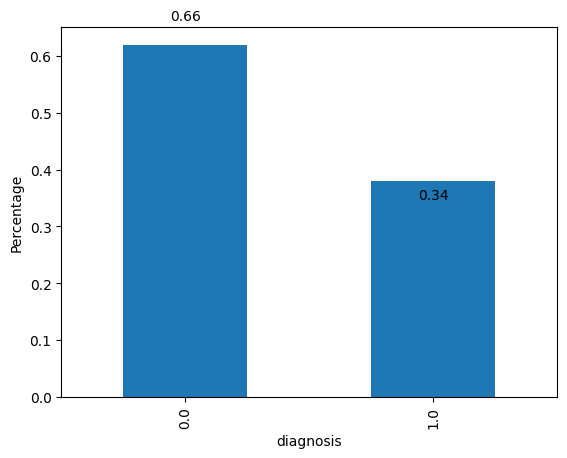

In [ ]:
train["diagnosis"].value_counts(normalize=True).plot(kind="bar")
plt.xlabel("diagnosis")
plt.ylabel("Percentage")

# Add the percentage values manually using plt.text()
for i, v in enumerate(test["diagnosis"].value_counts(normalize=True)):
    plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")

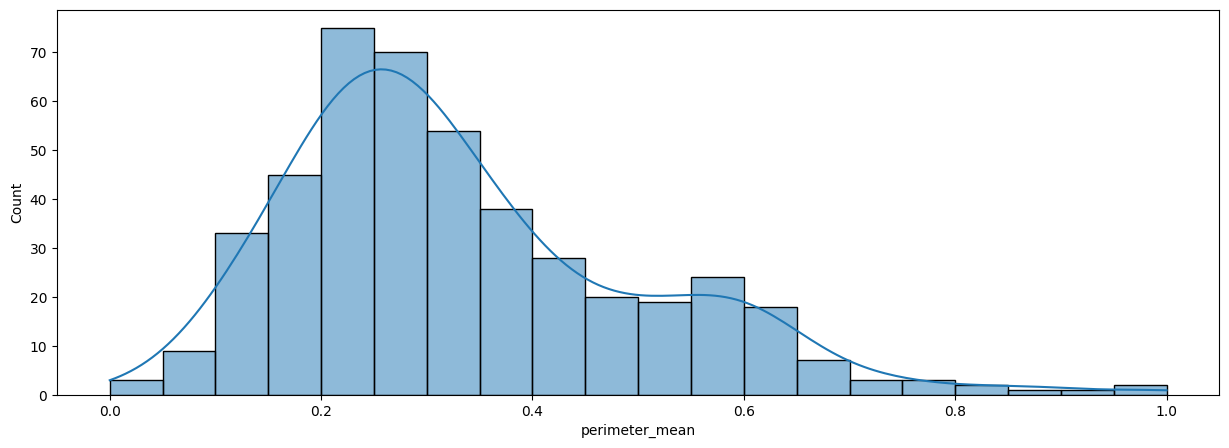

In [ ]:
continuous_features = ["perimeter_mean"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

for idx, feature in enumerate(continuous_features):
    sns.histplot(data=train, x=feature, ax=ax, kde=True) # Use ax directly instead of ax[idx]
plt.show()

Now for the fun part: training and assessing our model.

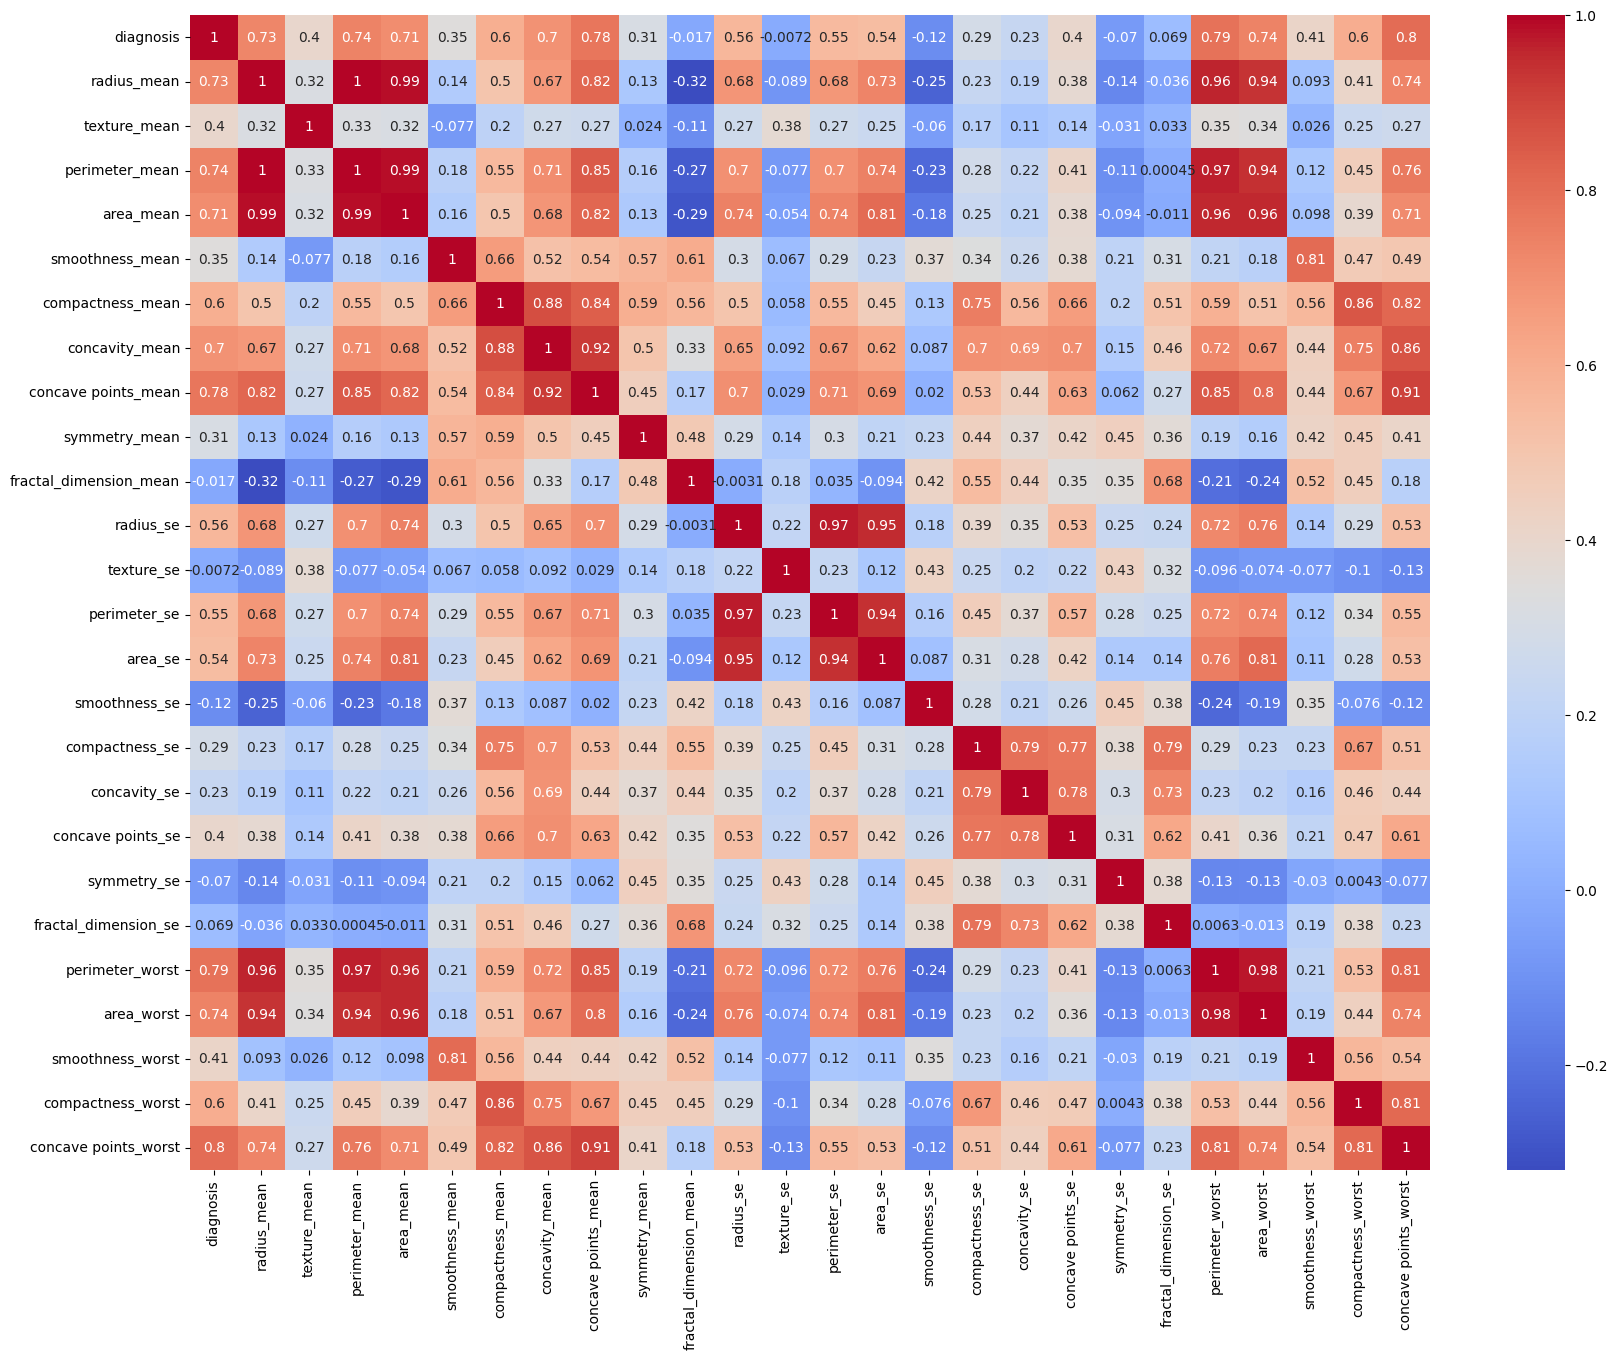

In [ ]:
correlations = train.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.show()

## Part 5: Model training

When it comes to training our model, we first have to decide what **features** the model is going to use. A feature is measurable property used as an input to a model, and may also be called a 'variable' or a 'predictor'. In our case, each of the columns in our dataset can be used as a feature.

In [ ]:
prediction_var = ['radius_mean', 'perimeter_mean', 'compactness_mean', 'concavity_mean']
#prediction_var  = ['radius_mean']

We can now create our input 'x' variables and our output 'y' variables for the training and test sets:

In [ ]:
train_x = train[prediction_var]
train_y = train.diagnosis

test_x = test[prediction_var]
test_y = test.diagnosis

To create our training and test data, we select a subset of the training/test data by passing a list in the square brackets. We only select the columns specified in the list `prediction_var` of the DataFrame.

We'll now import our model. We're going to use the 'MLPClassifier' from sci-kit learn. 'MLP' stands for 'multi-layer perceptron' and is a basic type of neural network. It's one of many models that can be used for **classification** tasks, where we take some inputs and produce an output class (e.g. cancer vs not cancer).

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='sgd', hidden_layer_sizes=(5, 2))
model.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5, 2), solver='sgd')

We can declare our model and its variables as below. Here, we're using a neural network with 2 hidden layers with 5 neurons. We specify that when defining our model, by including `hidden_layer_sizes=(5, 2)`.
1. MLPClassifier:

This is the core component – the Multi-layer Perceptron Classifier. It's a neural network specifically designed for classification tasks.

You'll typically use it with labeled data, where you want the model to learn from examples to predict a category (e.g., spam/not spam, cat/dog, etc.).

2. hidden_layer_sizes=(5, 2):

This is the crucial part where you define the structure of your neural network.

(5, 2): This tuple defines the number of neurons in each hidden layer.

5: The first hidden layer will have 5 neurons.

2: The second hidden layer will have 2 neurons.

Visualizing the Structure:

Think of it like this:

Input Layer (Features) --> Hidden Layer 1 (5 neurons) --> Hidden Layer 2 (2 neurons) --> Output Layer (Predictions)

In [ ]:
from sklearn.linear_model import LogisticRegression

modelLR = LogisticRegression()
modelLR.fit(train_x, train_y)

LogisticRegression()

In [ ]:
from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier from sklearn.ensemble

modelRF = RandomForestClassifier()
modelRF.fit(train_x, train_y)

RandomForestClassifier()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # import KNeighborsClassifier from sklearn.neighbors

modelKN = KNeighborsClassifier()
modelKN.fit(train_x, train_y)

KNeighborsClassifier()

In [ ]:
from sklearn.svm import SVC # import the SVC class from sklearn.svm

modelSVM = SVC() # use the correct class name
modelSVM.fit(train_x, train_y)

SVC()

In [ ]:
predictions = model.predict(test_x)
predictionsLR = modelLR.predict(test_x)
predictionsRF = modelRF.predict(test_x)
predictionsKN = modelKN.predict(test_x)
predictionsSVM = modelSVM.predict(test_x)


That was it. In two lines of code, we just trained a neural network and used it to make some predictions. We first called **model.fit()** with our training data inputs and outputs, and then we called **model.predict()** on our test data inputs.

In the next section, we'll look at how good the predictions are.

In [ ]:
test_x

,radius_mean,perimeter_mean,compactness_mean,concavity_mean
0,0.329358,0.321471,0.239771,0.236645
1,0.127124,0.122314,0.132507,0.069072
2,0.280610,0.267708,0.105147,0.090745
3,0.568839,0.550135,0.186798,0.217221
4,0.276823,0.270196,0.194191,0.136715
...,...,...,...,...
109,0.079985,0.073457,0.071713,0.000000
110,0.521037,0.511437,0.340531,0.281396
111,0.166075,0.159422,0.145390,0.053819
112,0.214823,0.207864,0.180050,0.101406


In [116]:
predictionsSVM

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.])

In [125]:
test_y.head(20)

,diagnosis
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
5,0.0
6,0.0
7,1.0
8,1.0
9,0.0


## Part 6: Quantifying performance of our model


### F1 score, accuracy and AUC

In [126]:
from sklearn.metrics import f1_score

f1MPLC_score = f1_score(test_y, predictions)
f1LR_score = f1_score(test_y, predictionsLR)
f1RF_score = f1_score(test_y, predictionsRF)
f1KN_score = f1_score(test_y, predictionsKN)
f1SVM_score = f1_score(test_y, predictionsSVM)
print("FI MPLC", f1MPLC_score)
print("F1 LR", f1LR_score)
print("F1 RF", f1RF_score)
print("F1 KN", f1KN_score)
print("F1 SVM", f1SVM_score)


FI MPLC 0.5964912280701754
F1 LR 0.88
F1 RF 0.85
F1 KN 0.8461538461538461
F1 SVM 0.8607594936708861


Other popular metrics are the overall accuracy and the AUC score:

In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

accuracy = accuracy_score(test_y, predictions)
AUC = roc_auc_score(test_y, predictions)
accuracyLR = accuracy_score(test_y, predictionsLR)
AUCLR = roc_auc_score(test_y, predictions)
accuracyRF = accuracy_score(test_y, predictionsRF)
AUCRF = roc_auc_score(test_y, predictionsRF)
accuracyKN = accuracy_score(test_y, predictionsKN)
AUCKN = roc_auc_score(test_y, predictionsKN)
accuracySVM = accuracy_score(test_y, predictionsSVM)
AUCSVM = roc_auc_score(test_y, predictionsSVM)

print("The accuracy MPLC is ", "%.2f" %accuracy)
print("The AUC MLPC ", "%.2f" %AUC)
print("The accuracy LR is ", "%.2f" %accuracyLR)
print("The AUC LR", "%.2f" %AUCLR)
print("The accuracy RF is ", "%.2f" %accuracyRF)
print("The AUC RF ", "%.2f" %AUCRF)
print("The accuracy KN is ", "%.2f" %accuracyKN)
print("The AUC KN ", "%.2f" %AUCKN)
print("The accuracy SVM is ", "%.2f" %accuracySVM)
print("The AUC SVM ", "%.2f" %AUCSVM)



The accuracy MPLC is  0.80
The AUC MLPC  0.71
The accuracy LR is  0.92
The AUC LR 0.71
The accuracy RF is  0.89
The AUC RF  0.89
The accuracy KN is  0.89
The AUC KN  0.88
The accuracy SVM is  0.90
The AUC SVM  0.90


For more information on performance metrics and how to interpret them, see [these slides](https://www.chrislovejoy.me/slides/data-science-pipeline/#/38) or [this video](https://www.youtube.com/watch?v=xlrj1iFCYUk).

### The confusion matrix

A helpful way to visualise our results, beyond just single-point scores, is the confusion matrix. This involves plotting actual classes vs predicted classes.

In [129]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_y, predictionsSVM)
conf_matrix

array([[69,  6],
       [ 5, 34]])

To better understand this matrix, let's plot it in a more visually-aesthetic way, using the popular visualisation library: [**matplotlib**](https://matplotlib.org).

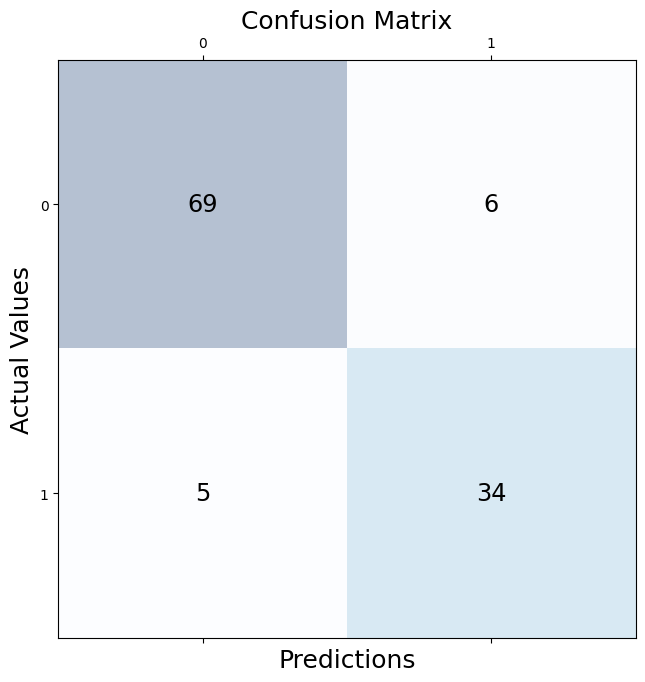

In [130]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual Values', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Understanding the confusion matrix

Let's now make sure that we understand the confusion matrix itself.

On the x-axis we have predictions. On the y-axis we have the actual values (ie. whether it's *really* cancerous or not).

Given that, let's consider the following questions:

1. In which boxes is the model creating the right predictions? And where is it making wrong predictions?
2. The consequences of the errors depend on how we're using our model. When we're trying to predict cancer (as in our exercise), which type of error is worse?
3. What's a situation in which the other type of error is worse?


## Next Steps

Have a go at modifying our pipeline, including:

- Different features (using the 'prediction_var' list)
- Different parameters (such as different learning rates and neural network layers or different train/test splits)
- Different models
- Learn about [AUC and ROC Curves](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)

**Test yourself to see what is the best performance you can achieve.**
